In [2]:
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import Descriptors
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import rdMolDescriptors as rdescriptors

import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

In [40]:
import csv
with open('../bojicm/compound/chembl395.csv', 'r') as csvfile:
    reader = csv.DictReader(csvfile, delimiter=";")
    #mtor_ligands = [Chem.MolFromSmiles(m['Smiles']) for m in reader]
    rawdata = [x for x in reader]
table = pd.DataFrame(rawdata)
table = table[['Molecule ChEMBL ID' , 'Molecular Weight', 'AlogP',  'Smiles','Standard Type',]]
table.head()

,Molecule ChEMBL ID,Molecular Weight,AlogP,Smiles,Standard Type
0,CHEMBL3298482,364.39,3.29,O=[N+]([O-])c1cc(CSc2nnnn2C2CCCCC2)cc([N+](=O)...,IC50
1,CHEMBL3298549,403.34,2.68,O=[N+]([O-])c1cccc(-n2nnnc2SCc2cc([N+](=O)[O-]...,IC50
2,CHEMBL4287678,524.83,6.89,C[C@@H]1[C@H]2C3=CC[C@@H]4[C@@]5(C)CCC(=O)C(C)...,IC50
3,CHEMBL2017974,410.40,1.81,Nc1cc(C(F)(F)F)c(-c2cc(N3CCOCC3)nc(N3CCOCC3)n2...,IC50
4,CHEMBL3358354,392.43,0.37,O=C1[C@@H]2[C@@H]3CC[C@@H](O3)[C@@H]2C(=O)N1c1...,IC50


In [41]:
mtor_ligands = [Chem.MolFromSmiles(m) for m in table['Smiles']]

In [42]:
len(mtor_ligands)

20127

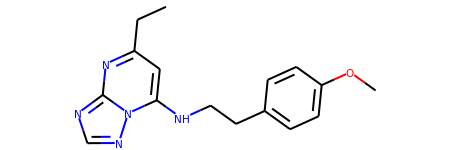

In [43]:
mtor_ligands[15555] #randomly chosen Mol instance

In [44]:
# count of rings:
Chem.GetSSSR(mtor_ligands[15555])

3

In [45]:
# count of rotatable bonds:
Chem.CalcNumRotatableBonds(mtor_ligands[15555])

6

In [46]:
# count of all heavy/non-hydrogen atoms
mtor_ligands[15555].GetNumHeavyAtoms()

22

In [47]:
# hydrogen bond acceptors / donors
from rdkit.Chem import rdMolDescriptors as rdescriptors
rdescriptors.CalcNumLipinskiHBA(mtor_ligands[15555]), rdescriptors.CalcNumLipinskiHBD(mtor_ligands[15555])

(6, 1)

In [48]:
# molecular weight
rdescriptors.CalcExactMolWt(mtor_ligands[15555])

297.15896022800007

In [49]:
# topological polar surface area
rdescriptors.CalcTPSA(mtor_ligands[15555])

64.34

In [50]:
# octanol-water partition coefficient
Descriptors.MolLogP(mtor_ligands[15555])

2.3499

In [51]:
mtor_rings = [Chem.GetSSSR(l) for l in mtor_ligands]
mtor_rotatable = [Chem.CalcNumRotatableBonds(l) for l in mtor_ligands]
mtor_atomcount = [l.GetNumHeavyAtoms() for l in mtor_ligands]
mtor_hba = [rdescriptors.CalcNumLipinskiHBA(l) for l in mtor_ligands]
mtor_hbd = [rdescriptors.CalcNumLipinskiHBD(l) for l in mtor_ligands]
mtor_molwt = [rdescriptors.CalcExactMolWt(l) for l in mtor_ligands]
mtor_tpsa = [rdescriptors.CalcTPSA(l) for l in mtor_ligands]
mtor_logp = [Descriptors.MolLogP(l) for l in mtor_ligands]

In [52]:
sns.set(rc={'figure.figsize':(11.7, 11.7)}) # for bigger graphs

In [53]:
df = pd.DataFrame(data={'set':'mtor', 'rings': mtor_rings,
                        'rotatable': mtor_rotatable, 'atoms': mtor_atomcount,
                        'hba': mtor_hba, 'hbd': mtor_hbd, 'molwt': mtor_molwt,
                        'tpsa': mtor_tpsa, 'logp': mtor_logp})
df

,set,rings,rotatable,atoms,hba,hbd,molwt,tpsa,logp
0,mtor,3,6,25,10,0,364.095374,129.88,3.28700
1,mtor,3,7,28,13,0,403.033502,173.02,2.67920
2,mtor,5,4,38,4,1,524.434179,49.41,6.89090
3,mtor,4,3,29,8,2,410.167809,89.63,1.81280
4,mtor,5,3,27,8,0,392.104207,93.22,0.37430
...,...,...,...,...,...,...,...,...,...
20122,mtor,6,8,50,11,4,697.308719,124.63,6.32790
20123,mtor,3,2,22,3,1,294.116841,41.99,2.86000
20124,mtor,4,4,29,5,1,399.119461,59.91,4.64692
20125,mtor,5,3,29,6,0,394.141638,63.22,3.70330


<AxesSubplot:>

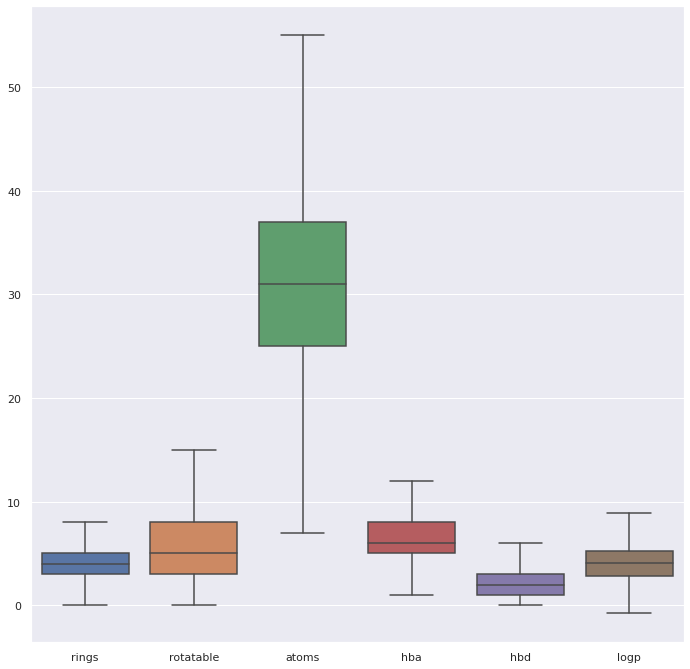

In [54]:
sns.boxplot(data=df[['rings', 'rotatable', 'atoms', 'hba', 'hbd', 'logp']], showfliers=False)

<AxesSubplot:>

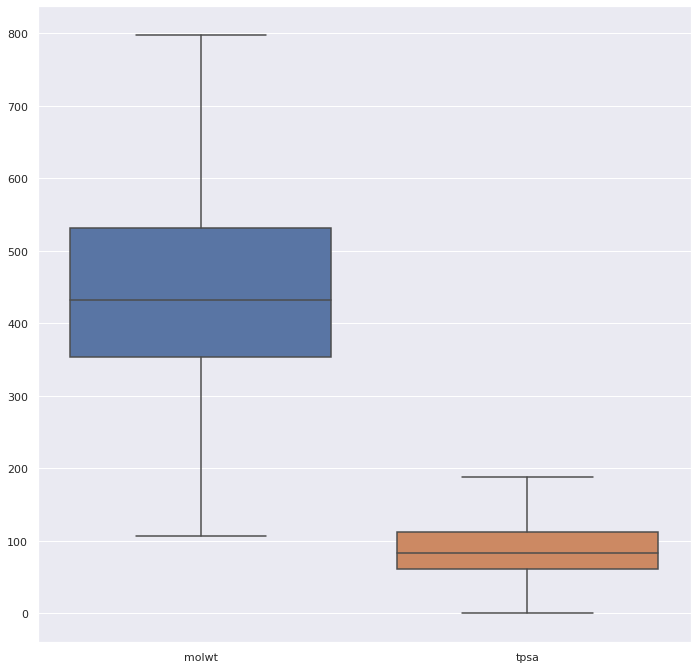

In [55]:
sns.boxplot(data=df[['molwt', 'tpsa']], showfliers = False)

In [56]:
suppl = Chem.SDMolSupplier('../data/drugbank.sdf') #database of registered pharmaceuticals
drugs = [m for m in suppl if m]
len(drugs)

RDKit ERROR: [15:59:16] ERROR: Explicit valence for atom # 0 C greater than permitted
RDKit ERROR: [16:10:48] Explicit valence for atom # 7 N, 4, is greater than permitted
RDKit ERROR: [16:10:48] ERROR: Could not sanitize molecule ending on line 20009
RDKit WARNING: [16:10:48] Warning: conflicting stereochemistry at atom 5 ignored.
RDKit WARNING: [16:10:48] Warning: conflicting stereochemistry at atom 5 ignored.
RDKit ERROR: [16:10:48] ERROR: Explicit valence for atom # 7 N, 4, is greater than permitted
RDKit ERROR: [16:10:48] Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [16:10:48] ERROR: Could not sanitize molecule ending on line 250947
RDKit ERROR: [16:10:48] ERROR: Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [16:10:48] Explicit valence for atom # 17 O, 3, is greater than permitted
RDKit ERROR: [16:10:48] ERROR: Could not sanitize molecule ending on line 258130
RDKit ERROR: [16:10:48] ERROR: Explicit v

RDKit ERROR: [16:10:49] ERROR: Can't kekulize mol.  Unkekulized atoms: 4 5 6 7 8 9 10 11 12
RDKit ERROR: 
RDKit ERROR: [16:10:49] Can't kekulize mol.  Unkekulized atoms: 5 6 7 8 9 10 11 12 13
RDKit ERROR: 
RDKit ERROR: [16:10:49] ERROR: Could not sanitize molecule ending on line 616025
RDKit ERROR: [16:10:49] ERROR: Can't kekulize mol.  Unkekulized atoms: 5 6 7 8 9 10 11 12 13
RDKit ERROR: 
RDKit ERROR: [16:10:49] Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [16:10:49] ERROR: Could not sanitize molecule ending on line 623202
RDKit ERROR: [16:10:49] ERROR: Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [16:10:49] Can't kekulize mol.  Unkekulized atoms: 5 6 7 8 9 10 11 12 13
RDKit ERROR: 
RDKit ERROR: [16:10:49] ERROR: Could not sanitize molecule ending on line 628065
RDKit ERROR: [16:10:49] ERROR: Can't kekulize mol.  Unkekulized atoms: 5 6 7 8 9 10 11 12 13
RDKit ERROR: 
RDKit ERROR: [16:10:49] Explicit val

7113

In [57]:
drugbank_rings = [Chem.GetSSSR(l) for l in drugs]
drugbank_rotatable = [Chem.CalcNumRotatableBonds(l) for l in drugs]
drugbank_atomcount = [l.GetNumHeavyAtoms() for l in drugs]
drugbank_hba = [rdescriptors.CalcNumLipinskiHBA(l) for l in drugs]
drugbank_hbd = [rdescriptors.CalcNumLipinskiHBD(l) for l in drugs]
drugbank_molwt = [rdescriptors.CalcExactMolWt(l) for l in drugs]
drugbank_tpsa = [rdescriptors.CalcTPSA(l) for l in drugs]
drugbank_logp = [Descriptors.MolLogP(l) for l in drugs]

In [58]:
df_drugbank = pd.DataFrame(data={'set':'drugs', 'rings': drugbank_rings,
                                 'rotatable': drugbank_rotatable, 'atoms': drugbank_atomcount,
                                 'hba': drugbank_hba, 'hbd': drugbank_hbd, 'molwt': drugbank_molwt,
                                 'tpsa': drugbank_tpsa, 'logp': drugbank_logp})
df_drugbank

,set,rings,rotatable,atoms,hba,hbd,molwt,tpsa,logp
0,drugs,6,66,155,57,31,2178.985813,901.57,-8.11643
1,drugs,6,31,91,32,20,1268.641439,495.89,-3.10570
2,drugs,4,19,74,26,18,1068.426955,435.41,-4.13203
3,drugs,6,38,102,31,20,1429.669818,495.67,-0.50613
4,drugs,1,15,85,23,5,1201.841368,278.80,3.26900
...,...,...,...,...,...,...,...,...,...
7108,drugs,1,0,8,1,1,128.002892,20.23,2.04560
7109,drugs,3,3,24,9,5,340.079432,149.82,-1.32270
7110,drugs,6,14,79,27,13,1114.554641,403.10,1.54710
7111,drugs,0,13,21,5,0,330.147689,83.50,-0.00030


In [59]:
joint_df = pd.concat([df, df_drugbank], ignore_index=True)
joint_df

,set,rings,rotatable,atoms,hba,hbd,molwt,tpsa,logp
0,mtor,3,6,25,10,0,364.095374,129.88,3.2870
1,mtor,3,7,28,13,0,403.033502,173.02,2.6792
2,mtor,5,4,38,4,1,524.434179,49.41,6.8909
3,mtor,4,3,29,8,2,410.167809,89.63,1.8128
4,mtor,5,3,27,8,0,392.104207,93.22,0.3743
...,...,...,...,...,...,...,...,...,...
27235,drugs,1,0,8,1,1,128.002892,20.23,2.0456
27236,drugs,3,3,24,9,5,340.079432,149.82,-1.3227
27237,drugs,6,14,79,27,13,1114.554641,403.10,1.5471
27238,drugs,0,13,21,5,0,330.147689,83.50,-0.0003


In [60]:
melted_df = pd.melt(joint_df, id_vars=['set'], value_vars=['rings', 'rotatable', 'atoms', 'hba', 'hbd', 'logp'])
melted_df

,set,variable,value
0,mtor,rings,3.0000
1,mtor,rings,3.0000
2,mtor,rings,5.0000
3,mtor,rings,4.0000
4,mtor,rings,5.0000
...,...,...,...
163435,drugs,logp,2.0456
163436,drugs,logp,-1.3227
163437,drugs,logp,1.5471
163438,drugs,logp,-0.0003


<AxesSubplot:xlabel='variable', ylabel='value'>

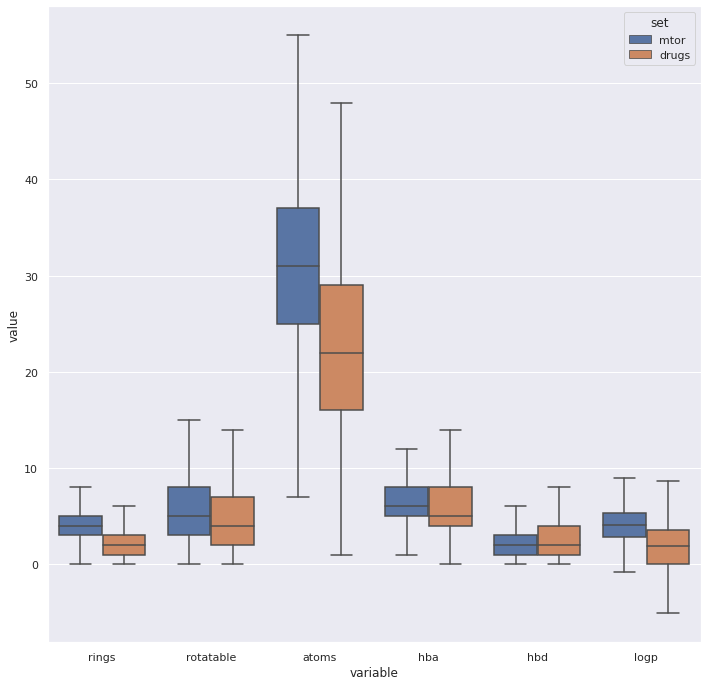

In [61]:
sns.boxplot(y='value', x='variable', hue='set', data=melted_df, showfliers=False)

In [62]:
melted_df2 = pd.melt(joint_df, id_vars=['set'], value_vars=['molwt', 'tpsa'])
melted_df2

,set,variable,value
0,mtor,molwt,364.095374
1,mtor,molwt,403.033502
2,mtor,molwt,524.434179
3,mtor,molwt,410.167809
4,mtor,molwt,392.104207
...,...,...,...
54475,drugs,tpsa,20.230000
54476,drugs,tpsa,149.820000
54477,drugs,tpsa,403.100000
54478,drugs,tpsa,83.500000


<AxesSubplot:xlabel='variable', ylabel='value'>

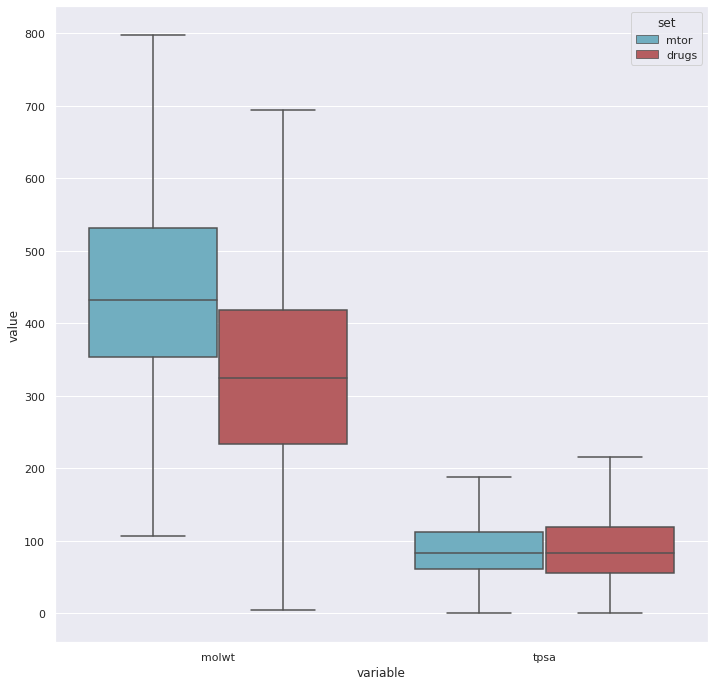

In [63]:
sns.boxplot(y='value', x='variable', hue='set', data=melted_df2, showfliers=False,palette={'c','r'})

In [64]:
mtor_heteroatoms_ratio = [rdescriptors.CalcNumHeteroatoms(l)/l.GetNumHeavyAtoms() for l in mtor_ligands]
drugbank_heteroatoms_ratio = [rdescriptors.CalcNumHeteroatoms(l)/l.GetNumHeavyAtoms() for l in drugs]
# heterocycles = cycles with heteroatoms
mtor_heterocycles_ratio = [rdescriptors.CalcNumHeterocycles(l)/rdescriptors.CalcNumRings(l)
                           for l in mtor_ligands if rdescriptors.CalcNumRings(l)]
drugbank_heterocycles_ratio = [rdescriptors.CalcNumHeterocycles(l)/rdescriptors.CalcNumRings(l)
                               for l in drugs if rdescriptors.CalcNumRings(l)]

ZeroDivisionError: division by zero

In [66]:
# Put the data into a DataFrame object, one formatted so that we don't need to 'melt' it for mapping into boxplot
# Make an initial dataframe, then extend it by each additional set
df = pd.DataFrame(data=[{'set': 'mtor', 'variable': 'heteroatom_ratio', 'value': x}
                        for x in mtor_heteroatoms_ratio])
df = df.append(pd.DataFrame(data=[{'set': 'drugbank', 'variable': 'heteroatom_ratio', 'value': x}
                                  for x in drugbank_heteroatoms_ratio]), ignore_index=True)
df = df.append(pd.DataFrame(data=[{'set': 'mtor', 'variable': 'heterocycle_ratio', 'value': x}
                                  for x in mtor_heterocycles_ratio]), ignore_index=True)
df = df.append(pd.DataFrame(data=[{'set': 'drugbank', 'variable': 'heterocycle_ratio', 'value': x}
                                  for x in drugbank_heterocycles_ratio]), ignore_index=True)
df

NameError: name 'mtor_heteroatoms_ratio' is not defined